In [14]:
# Import the dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import time

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hambantota
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | bud
P

Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | peace river
Processing Record 43 of Set 4 | saquarema
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | pokhara
Processing Record 46 of Set 4 | vanavara
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | kuche
City not found. Skipping...
Processing Record 50 of Set 4 | bonavista
Processing Record 1 of Set 5 | noumea
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | porterville
Processing Record 4 of Set 5 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | george town
Processing Record 7 of Set 5 | kattivakkam
Processing Record 8 of Set 5 | hami
Processing Record 9 of Set 5 | miri
Processing Record 10 of Set 5 | cartagena
Processing Record 11 of Set 5 | adrar
P

Processing Record 28 of Set 8 | hovd
Processing Record 29 of Set 8 | coihaique
Processing Record 30 of Set 8 | monrovia
Processing Record 31 of Set 8 | apple valley
Processing Record 32 of Set 8 | lamu
Processing Record 33 of Set 8 | teeli
Processing Record 34 of Set 8 | freeport
Processing Record 35 of Set 8 | amga
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | kralendijk
Processing Record 38 of Set 8 | rush
Processing Record 39 of Set 8 | tateyama
Processing Record 40 of Set 8 | taltal
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | batagay-alyta
Processing Record 43 of Set 8 | monte santo de minas
Processing Record 44 of Set 8 | al
City not found. Skipping...
Processing Record 45 of Set 8 | kitimat
Processing Record 46 of Set 8 | launceston
Processing Record 47 of Set 8 | vila do maio
Processing Record 48 of Set 8 | trofors
Processing Record 49 of Set 8 | waipawa
Processing Record 50 of Set 8 | pindiga
Processing Record 1 of Se

Processing Record 16 of Set 12 | ancud
Processing Record 17 of Set 12 | yanan
City not found. Skipping...
Processing Record 18 of Set 12 | nogales
Processing Record 19 of Set 12 | tenosique
Processing Record 20 of Set 12 | energeticheskiy
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | oranjestad
Processing Record 23 of Set 12 | vung tau
Processing Record 24 of Set 12 | manoel urbano
Processing Record 25 of Set 12 | cidreira
Processing Record 26 of Set 12 | abashiri
Processing Record 27 of Set 12 | cururupu
Processing Record 28 of Set 12 | dekar
Processing Record 29 of Set 12 | ushtobe
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | bandar penggaram
City not found. Skipping...
Processing Record 32 of Set 12 | kerema
Processing Record 33 of Set 12 | bitung
Processing Record 34 of Set 12 | marawi
Processing Record 35 of Set 12 | buraydah
Processing Record 36 of Set 12 | kokologo
Processing Record 37 of Set 12 | dharchula


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,80.94,94,75,0.00,LK,2021-09-24 11:41:58
1,Mount Gambier,-37.8333,140.7667,46.31,81,75,9.22,AU,2021-09-24 11:41:58
2,Qaanaaq,77.4840,-69.3632,14.68,64,96,6.24,GL,2021-09-24 11:41:59
3,Yulara,-25.2406,130.9889,67.84,13,12,5.75,AU,2021-09-24 11:41:59
4,Faanui,-16.4833,-151.7500,76.57,69,18,9.64,PF,2021-09-24 11:42:00
5,Saint-Philippe,-21.3585,55.7679,78.39,84,48,13.18,RE,2021-09-24 11:42:00
6,Ostrovnoy,68.0531,39.5131,51.26,74,89,14.05,RU,2021-09-24 11:42:01
7,Hithadhoo,-0.6000,73.0833,81.25,73,100,9.48,MV,2021-09-24 11:42:02
8,Portland,45.5234,-122.6762,60.84,89,1,1.01,US,2021-09-24 11:40:55
9,Cape Town,-33.9258,18.4232,71.89,58,20,1.99,ZA,2021-09-24 11:41:55


In [10]:
len(city_data)

588

In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2021-09-24 11:41:58,6.1241,81.1185,80.94,94,75,0.00
1,Mount Gambier,AU,2021-09-24 11:41:58,-37.8333,140.7667,46.31,81,75,9.22
2,Qaanaaq,GL,2021-09-24 11:41:59,77.4840,-69.3632,14.68,64,96,6.24
3,Yulara,AU,2021-09-24 11:41:59,-25.2406,130.9889,67.84,13,12,5.75
4,Faanui,PF,2021-09-24 11:42:00,-16.4833,-151.7500,76.57,69,18,9.64
...,...,...,...,...,...,...,...,...,...
583,San Policarpo,PH,2021-09-24 11:46:51,12.1791,125.5072,83.12,81,98,10.04
584,Kudinovo,RU,2021-09-24 11:46:52,54.9994,36.2533,48.25,73,100,14.90
585,Ulaangom,MN,2021-09-24 11:46:53,49.9811,92.0667,45.09,57,96,17.16
586,Rajka,HU,2021-09-24 11:46:53,47.9964,17.1982,69.78,64,40,19.57


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

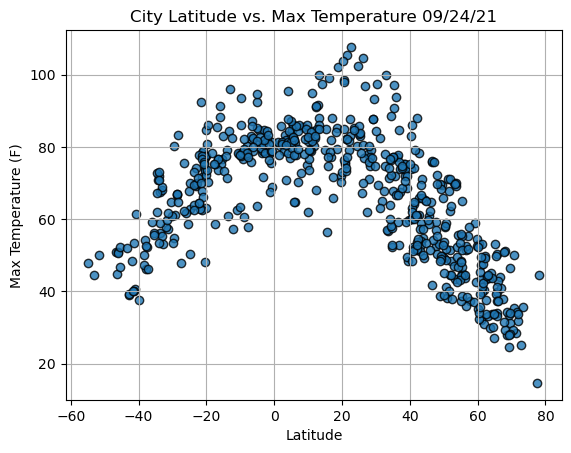

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

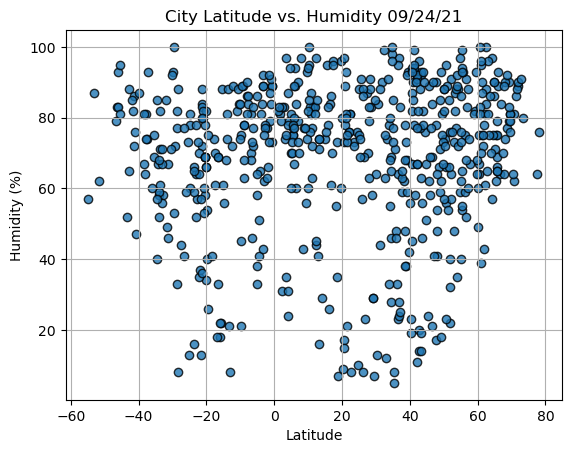

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

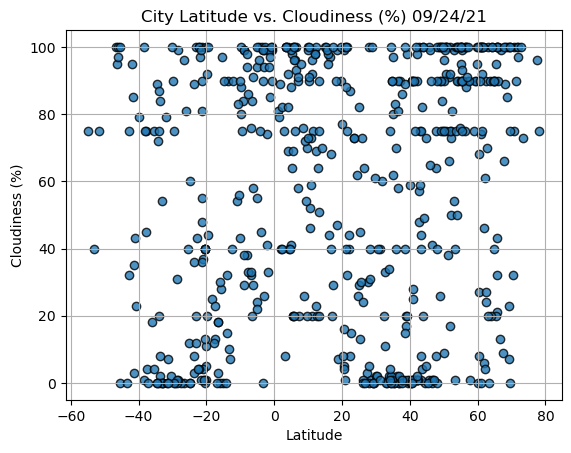

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

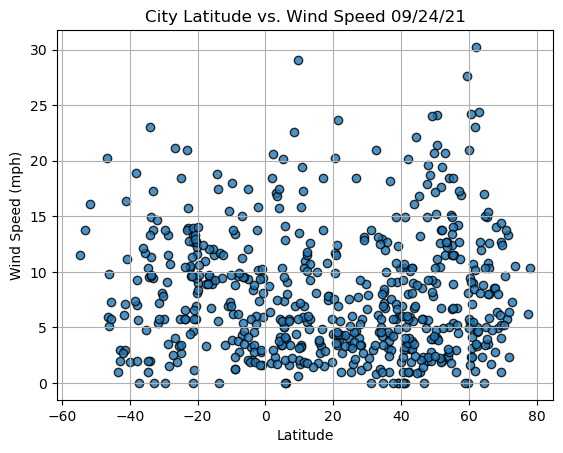

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()